## Black Friday Sales Analysis

#### A company named XYZ wants to identify the customer purchase behaviour against various products or various categories. The below dataset contains various information regarding each customer like age, gender along with the total amount spent last month. 
#### The goal is to build a Machine Learning Model to predict the purchase amount of customer against various products.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_train = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')

In [3]:
data = data_train.append(data_test)
# Appends the test data to the bottom of the train data
data.head()

C:\Users\prajw\AppData\Local\Temp\ipykernel_9800\2730994542.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data_train.append(data_test)


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 77.7+ MB


In [5]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
User_ID,783667.0,1.003029e+06,1727.266668,1000001.0,1001519.0,1003075.0,1004478.0,1006040.0
Occupation,783667.0,8.079300e+00,6.522206,0.0,2.0,7.0,14.0,20.0
Marital_Status,783667.0,4.097774e-01,0.491793,0.0,0.0,0.0,1.0,1.0
Product_Category_1,783667.0,5.366196e+00,3.878160,1.0,1.0,5.0,8.0,20.0
Product_Category_2,537685.0,9.844506e+00,5.089093,2.0,5.0,9.0,15.0,18.0
Product_Category_3,237858.0,1.266860e+01,4.125510,3.0,9.0,14.0,16.0,18.0
Purchase,550068.0,9.263969e+03,5023.065394,12.0,5823.0,8047.0,12054.0,23961.0


In [6]:
data.drop('User_ID', axis = 1, inplace = True)

### Handling Gender Feature

In [7]:
data['Gender'] = data['Gender'].map({'F':0,'M':1})

In [8]:
data.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,55+,16,C,4+,0,8,NaN,NaN,7969.0


### Handling Age Feature

In [9]:
data['Age'].value_counts()

26-35    313015
36-45    156724
18-25    141953
46-50     65278
51-55     54784
55+       30579
0-17      21334
Name: Age, dtype: int64

Highest people are from the age group 26-35 and 36-45

In [10]:
from sklearn.preprocessing import LabelEncoder
labelEncoder = LabelEncoder()

In [11]:
data['Age'] = labelEncoder.fit_transform(data['Age'])

In [12]:
data['Age'].value_counts()

2    313015
3    156724
1    141953
4     65278
5     54784
6     30579
0     21334
Name: Age, dtype: int64

In [13]:
data['Age'].unique()

array([0, 6, 2, 4, 5, 3, 1])

### Handling City_Category

In [14]:
data_city = pd.get_dummies(data['City_Category'], drop_first = True)

In [15]:
data = pd.concat([data, data_city], axis = 1)

In [16]:
data.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,0,10,A,2,0,3,NaN,NaN,8370.0,0,0
1,P00248942,0,0,10,A,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,0,10,A,2,0,12,NaN,NaN,1422.0,0,0
3,P00085442,0,0,10,A,2,0,12,14.0,NaN,1057.0,0,0
4,P00285442,1,6,16,C,4+,0,8,NaN,NaN,7969.0,0,1


In [17]:
data.drop('City_Category', axis = 1, inplace = True)

###  Missing Value Analysis

In [18]:
data.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
B                                  0
C                                  0
dtype: int64

<AxesSubplot:>

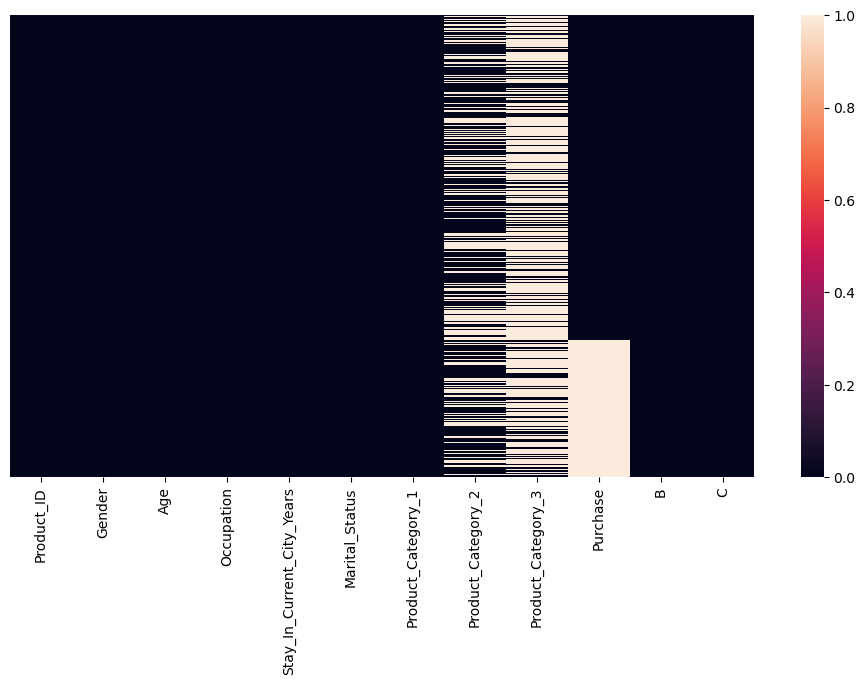

In [19]:
plt.figure(figsize = (12,6))
sns.heatmap(data.isnull(), yticklabels = False)

Purchase has missing values since there are no values for Purchase in the test data. The test data was appended with the train data in the beginning

In [20]:
data['Product_Category_2'].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [21]:
data['Product_Category_2'].value_counts()

8.0     91317
14.0    78834
2.0     70498
16.0    61687
15.0    54114
5.0     37165
4.0     36705
6.0     23575
11.0    20230
17.0    19104
13.0    15054
9.0      8177
12.0     7801
10.0     4420
3.0      4123
18.0     4027
7.0       854
Name: Product_Category_2, dtype: int64

### The best way to replace value is using Mode of the column

In [22]:
data['Product_Category_2'] = data['Product_Category_2'].fillna(data['Product_Category_2'].mode()[0])

In [23]:
data['Product_Category_2'].isnull().sum()

0

In [24]:
data['Product_Category_3'].unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [25]:
data['Product_Category_3'].value_counts()

16.0    46469
15.0    39968
14.0    26283
17.0    23818
5.0     23799
8.0     17861
9.0     16532
12.0    13115
13.0     7849
6.0      6888
18.0     6621
4.0      2691
11.0     2585
10.0     2501
3.0       878
Name: Product_Category_3, dtype: int64

In [26]:
data['Product_Category_3'] = data['Product_Category_3'].fillna(data['Product_Category_3'].mode()[0])

In [27]:
data['Product_Category_3'].isnull().sum()

0

### Handling Stay_In_Current_City_Years

In [28]:
data['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [29]:
data['Stay_In_Current_City_Years'].value_counts()

1     276425
2     145427
3     135428
4+    120671
0     105716
Name: Stay_In_Current_City_Years, dtype: int64

In [30]:
data['Stay_In_Current_City_Years'] = data['Stay_In_Current_City_Years'].str.replace('+','')

C:\Users\prajw\AppData\Local\Temp\ipykernel_9800\1014641989.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['Stay_In_Current_City_Years'] = data['Stay_In_Current_City_Years'].str.replace('+','')


In [31]:
data['Stay_In_Current_City_Years'] = data['Stay_In_Current_City_Years'].astype(int)

In [32]:
data['B'] = data['B'].astype(int)
data['C'] = data['C'].astype(int)

### Data Visualization

In [33]:
sns.set_style('darkgrid')
# sns.set_palette('inferno')

<AxesSubplot:xlabel='Age', ylabel='Purchase'>

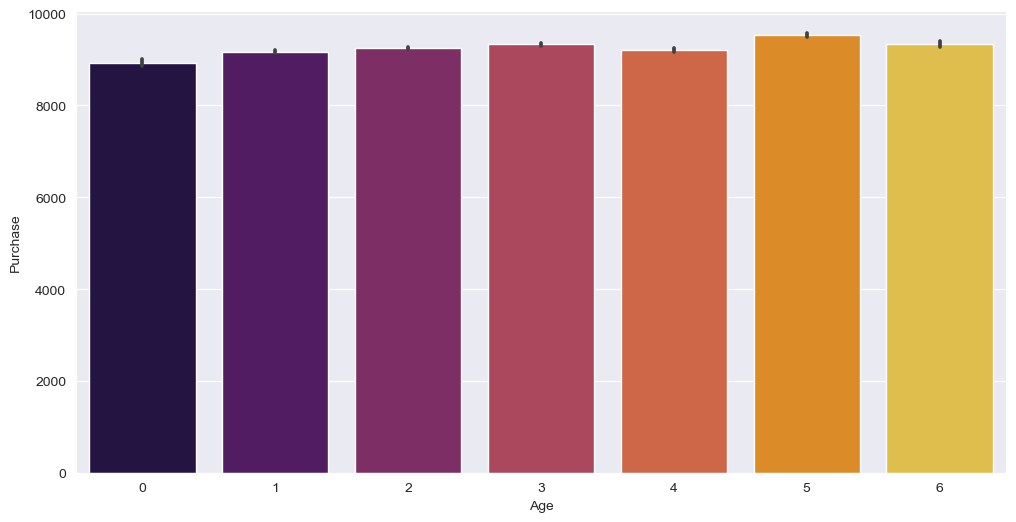

In [34]:
plt.figure(figsize = (12,6))
sns.barplot(x = 'Age',
            y = 'Purchase',
            data = data,
            palette = 'inferno')

<AxesSubplot:xlabel='Age', ylabel='Purchase'>

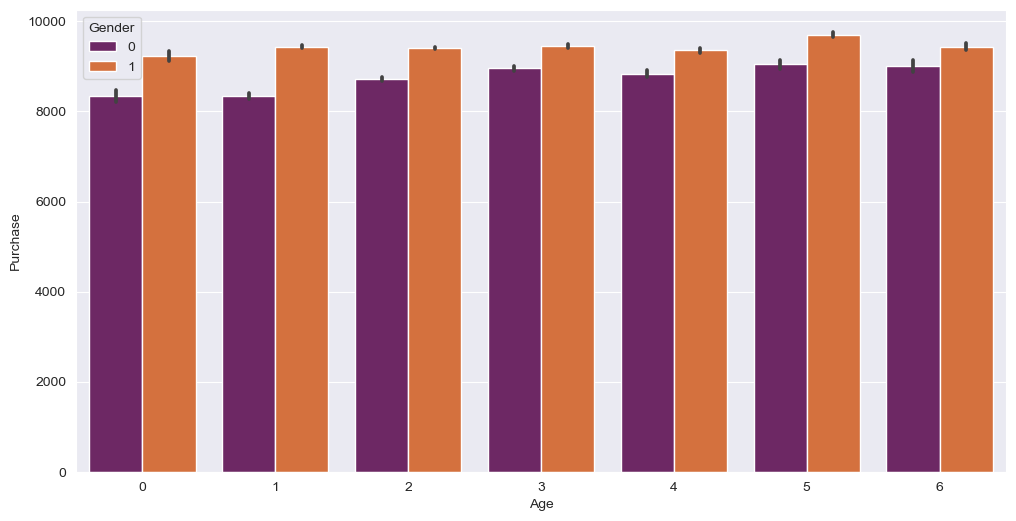

In [35]:
plt.figure(figsize = (12,6))
sns.barplot(x = 'Age',
            y = 'Purchase',
            data = data,
            hue = 'Gender',
            palette = 'inferno')

In [36]:
sns.set_style('darkgrid')

<AxesSubplot:xlabel='Age', ylabel='Purchase'>

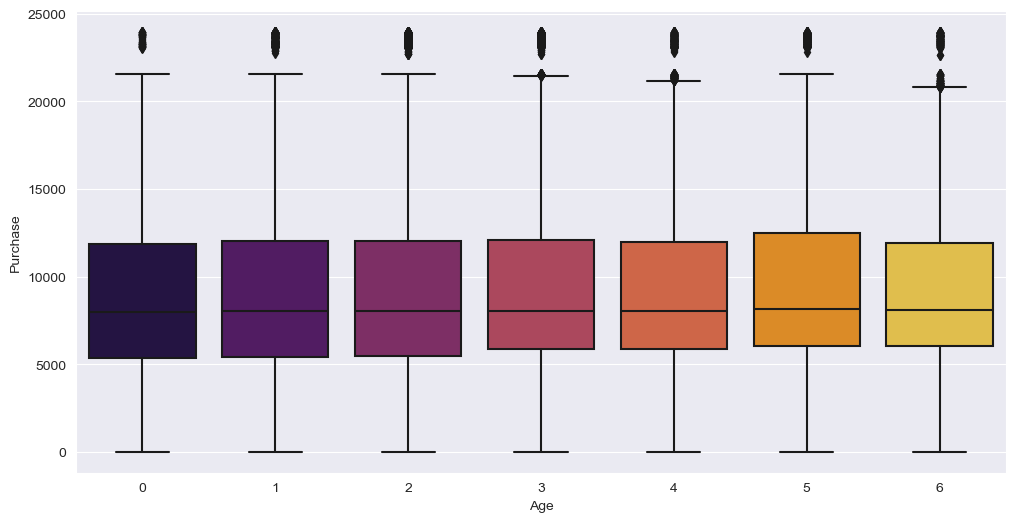

In [37]:
plt.figure(figsize = (12,6))
sns.boxplot(x = 'Age',
            y = 'Purchase',
            data = data,
            palette = 'inferno')

<AxesSubplot:xlabel='Occupation', ylabel='Purchase'>

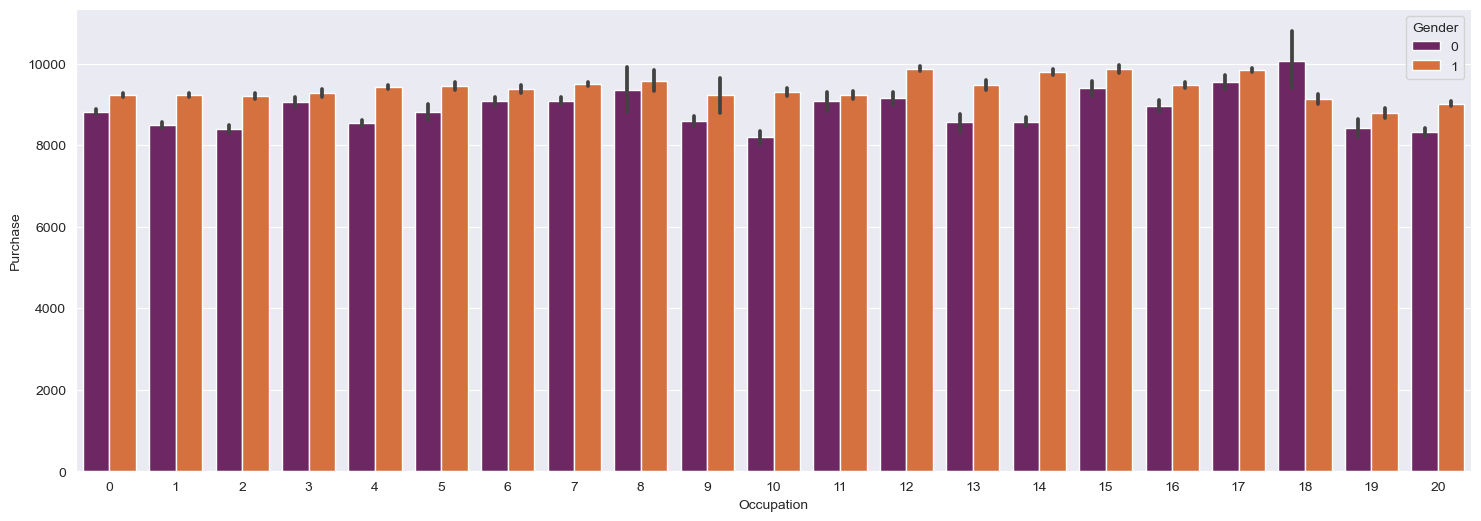

In [38]:
plt.figure(figsize = (18,6))
sns.barplot(x = 'Occupation',
            y = 'Purchase',
            data = data,
            hue = 'Gender',
            palette = 'inferno')

<AxesSubplot:xlabel='Product_Category_1', ylabel='Purchase'>

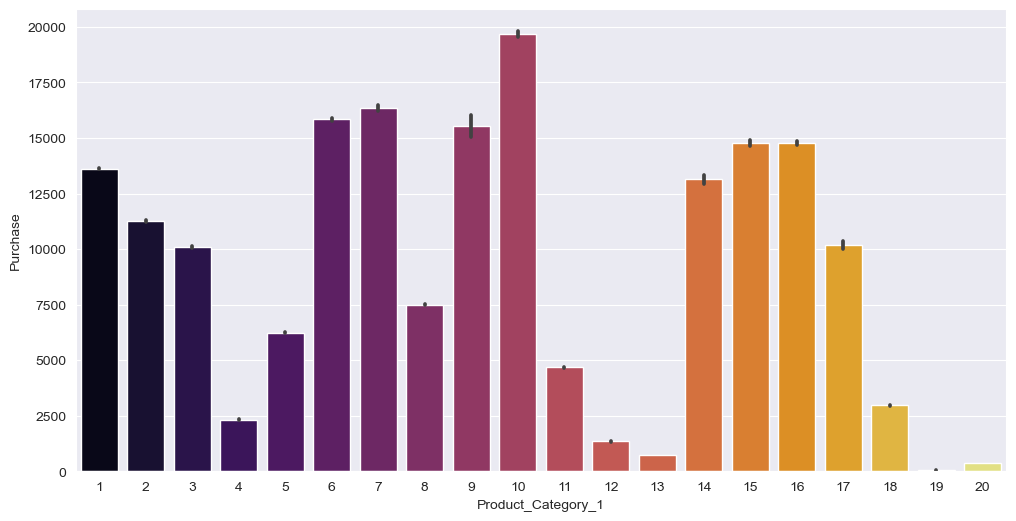

In [39]:
plt.figure(figsize = (12,6))
sns.barplot(x = 'Product_Category_1',
            y = 'Purchase',
            data = data,
            palette = 'inferno')

<AxesSubplot:xlabel='Product_Category_1', ylabel='Purchase'>

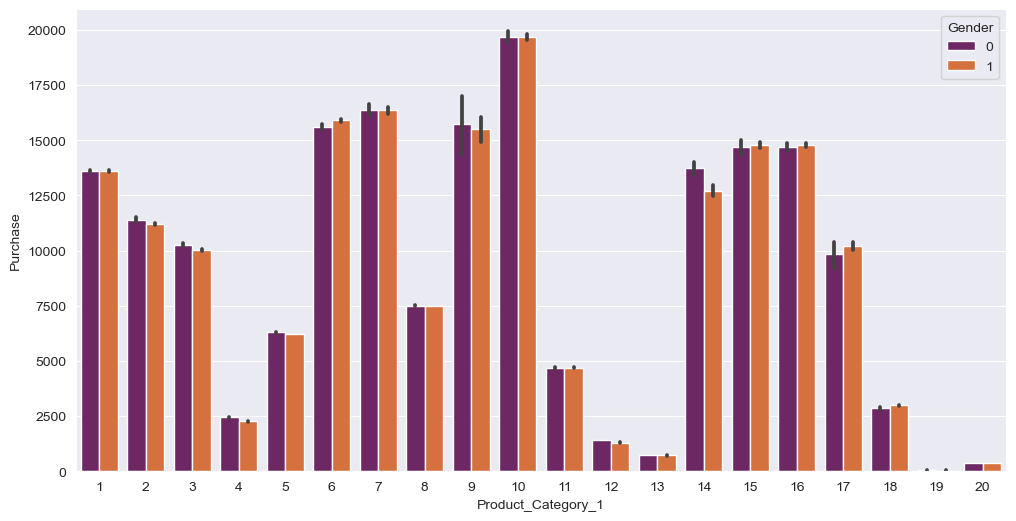

In [40]:
plt.figure(figsize = (12,6))
sns.barplot(x = 'Product_Category_1',
            y = 'Purchase',
            data = data,
            hue = 'Gender',
            palette = 'inferno')

<AxesSubplot:xlabel='Product_Category_2', ylabel='Purchase'>

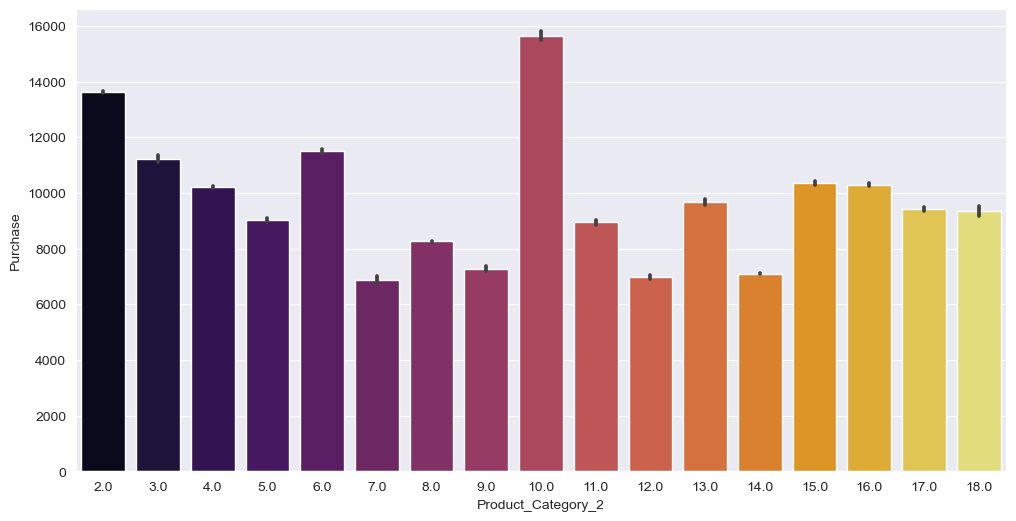

In [41]:
plt.figure(figsize = (12,6))
sns.barplot(x = 'Product_Category_2',
            y = 'Purchase',
            data = data,
            palette = 'inferno')

<AxesSubplot:xlabel='Product_Category_2', ylabel='Purchase'>

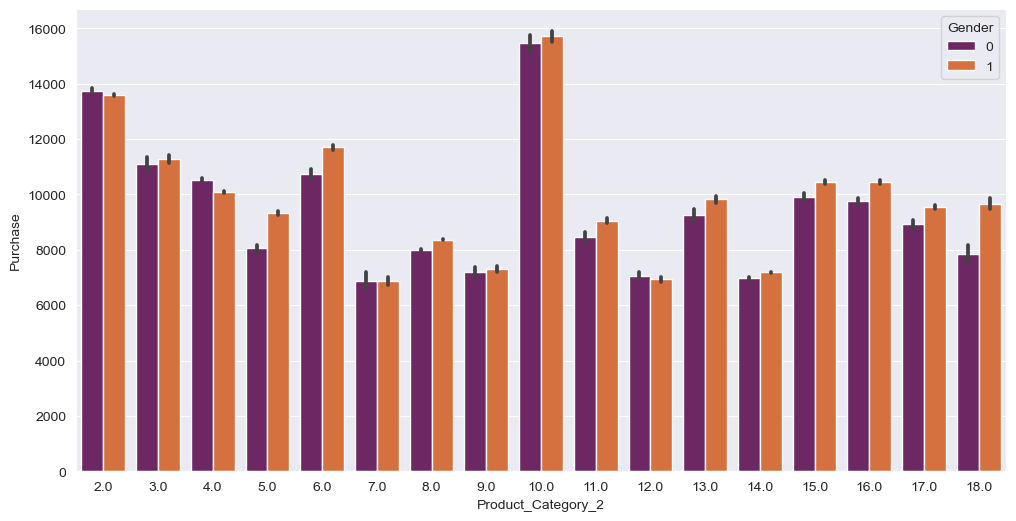

In [42]:
plt.figure(figsize = (12,6))
sns.barplot(x = 'Product_Category_2',
            y = 'Purchase',
            data = data,
            hue = 'Gender',
            palette = 'inferno')

<AxesSubplot:xlabel='Product_Category_3', ylabel='Purchase'>

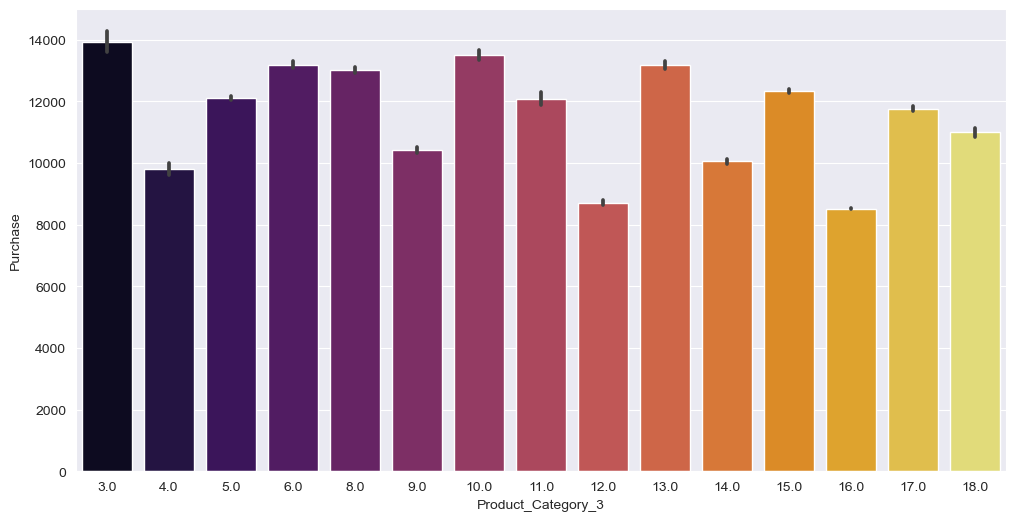

In [43]:
plt.figure(figsize = (12,6))
sns.barplot(x = 'Product_Category_3',
            y = 'Purchase',
            data = data,
            palette = 'inferno')

<AxesSubplot:xlabel='Product_Category_3', ylabel='Purchase'>

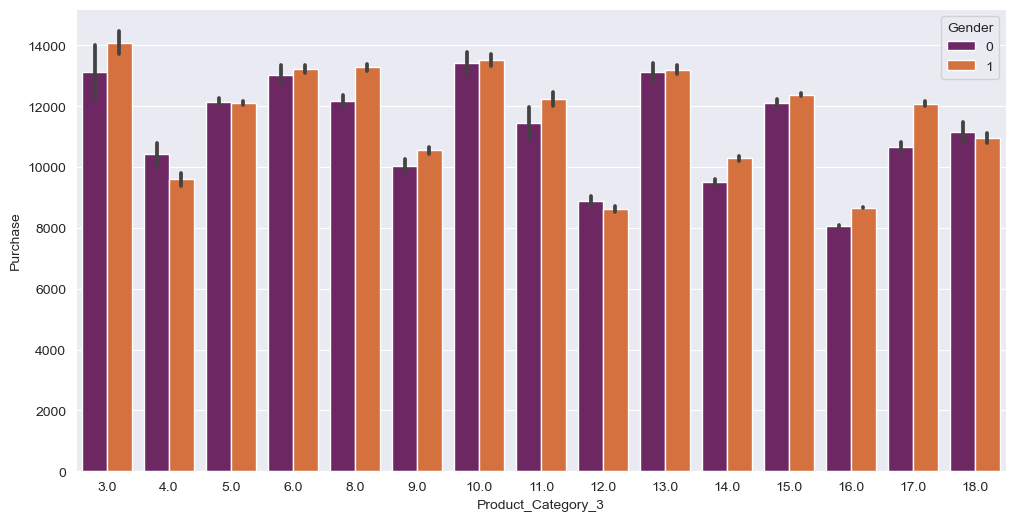

In [44]:
plt.figure(figsize = (12,6))
sns.barplot(x = 'Product_Category_3',
            y = 'Purchase',
            data = data,
            hue = 'Gender',
            palette = 'inferno')

### Feature Scaling and Train Test Split

In [45]:
data[data['Purchase'].isnull()]

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00128942,1,4,7,2,1,1,11.0,16.0,NaN,1,0
1,P00113442,1,2,17,0,0,3,5.0,16.0,NaN,0,1
2,P00288442,0,3,1,4,1,5,14.0,16.0,NaN,1,0
3,P00145342,0,3,1,4,1,4,9.0,16.0,NaN,1,0
4,P00053842,0,2,1,1,0,4,5.0,12.0,NaN,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
233594,P00118942,0,2,15,4,1,8,8.0,16.0,NaN,1,0
233595,P00254642,0,2,15,4,1,5,8.0,16.0,NaN,1,0
233596,P00031842,0,2,15,4,1,1,5.0,12.0,NaN,1,0
233597,P00124742,0,4,1,4,0,10,16.0,16.0,NaN,0,1


In [46]:
data_train = data[~data['Purchase'].isnull()]
# Include only that data for train data which has non null values in the purchase column

In [47]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  550068 non-null  object 
 1   Gender                      550068 non-null  int64  
 2   Age                         550068 non-null  int32  
 3   Occupation                  550068 non-null  int64  
 4   Stay_In_Current_City_Years  550068 non-null  int32  
 5   Marital_Status              550068 non-null  int64  
 6   Product_Category_1          550068 non-null  int64  
 7   Product_Category_2          550068 non-null  float64
 8   Product_Category_3          550068 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           550068 non-null  int32  
 11  C                           550068 non-null  int32  
dtypes: float64(3), int32(4), int64(4), object(1)
memory usage: 46.2+ MB


In [48]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
sc = StandardScaler()

In [49]:
X = data_train.drop(['Purchase','Product_ID'], axis = 1)
y = data_train['Purchase']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [50]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

### Training the Model

In [51]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(X_train,y_train)

DecisionTreeRegressor()

In [52]:
print(dt.score(X_train,y_train))
print(dt.score(X_test,y_test))

0.789186557402918
0.5754247307569764


In [53]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [54]:
rf.fit(X_train,y_train)
print(rf.score(X_train,y_train))
print(rf.score(X_test,y_test))

0.7793797674348653
0.6377965565701438


In [55]:
from sklearn.neighbors import KNeighborsRegressor
kn = KNeighborsRegressor()
kn.fit(X_train,y_train)

KNeighborsRegressor()

In [56]:
print(kn.score(X_train,y_train))
print(kn.score(X_test,y_test))

0.6525674601881568
0.5283451746703187
